- To evaluate the performane of any machine learning model we need to test it on some unseen data. Based on the model performance on unseen data we can say wether the model is underfit / overfit / well generalised




 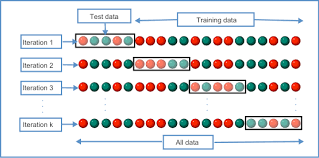
 
 

- One of the best approach for limited dataset
- Ideally, the value of k is 5-10
- Higher k Value leads to less biased(but large variance which might lead to overfit, where low k value is similar to train-test split method






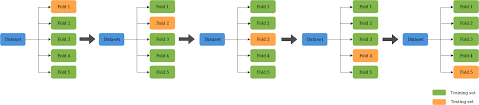

In [1]:
import pandas as pd
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.drop(["Cabin","Name","PassengerId","SibSp","Parch","Ticket","Embarked"], axis=1, inplace=True)

In [5]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [6]:
df['Age'] = df['Age'].fillna(value=df['Age'].median())

In [7]:
from sklearn.preprocessing import LabelEncoder
le_target=LabelEncoder()
le_Sex= LabelEncoder()
df["Sex_n"] = le_Sex.fit_transform(df['Sex'])
df['Pclass_n']=le_target.fit_transform(df['Pclass'])

In [8]:
df = df.drop(['Pclass','Sex'], axis='columns')
df

,Survived,Age,Fare,Sex_n,Pclass_n
0,0,22.0,7.2500,1,2
1,1,38.0,71.2833,0,0
2,1,26.0,7.9250,0,2
3,1,35.0,53.1000,0,0
4,0,35.0,8.0500,1,2
...,...,...,...,...,...
886,0,27.0,13.0000,1,1
887,1,19.0,30.0000,0,0
888,0,28.0,23.4500,0,2
889,1,26.0,30.0000,1,0


In [9]:
X = df.drop(['Survived'], axis='columns')
y = df['Survived']

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

In [11]:
#Decision Tree
from sklearn import tree
dc = tree.DecisionTreeClassifier()
dc.fit(X_train,y_train)
dc.score(X_test,y_test)

0.8100558659217877

In [12]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [13]:
from sklearn.model_selection import cross_val_score

In [14]:
cv = cross_val_score(dc,X,y,cv = 5)
cv

array([0.73184358, 0.76966292, 0.80898876, 0.79775281, 0.82022472])

In [15]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.8156424581005587

In [16]:
cv1 = cross_val_score(rf,X,y,cv = 5)
cv1

array([0.7877095 , 0.80337079, 0.84831461, 0.80337079, 0.83146067])

In [17]:
#SVM
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_train,y_train)
sv.score(X_test,y_test)

0.6536312849162011

In [19]:
cv2 = cross_val_score(SVC(gamma = 10),X,y,cv = 5)
cv2

array([0.65921788, 0.62921348, 0.66853933, 0.64606742, 0.58426966])

In [ ]:
#Summary
#1. DecisionTree = 73%, 76.9%, 80.8%, 79.77%, 82.02%
#2. RF = 78.77% , 80.33%, 84.83%, 80.33%, 83.14%
#3. SVC = 65.92%, 62.92%, 66.85%, 64.60%, 58.42%